<h1><center>19CSE304 Foundations of Data Science</center></h1>

<h2><center>Assigment :Alameda Jury- Robert Swain Case Study </center>



<div align='left'><h3><font color ='Green'>Nithin KM</font></div>
    
<div align='left'><h3><font color ='Green'>CB.EN.U4CSE20342</font></div>

<div align='left'><h3><font color ='Green'>28th Nov 2022</font></div>



In [16]:
from datascience import *
import pandas as pd
import numpy as np

In [17]:
%matplotlib inline
import matplotlib.pyplot as plots

### 1.	Read the case study given in Page no: 301- 311 of TB “Computational and Inferential Thinking”. It discusses about the selection of the jury in Alameda County extending the Robert swain case study (seen in class) to multiple categories. Answer the following questions: 

#### a)	State the Null hypothesis and the Alternate hypothesis. 

H0 = The panel of jury in Robert Swains trial is a random sample from the distribution provided for eligible jurors inclusive of a representative cross section of the population

Ha = The panel of jury in Robert Swains trial is **not** a random sample from the distribution provided for eligible jurors inclusive of a representative cross section of the population and is partial to the whites.

#### b)	Create a data frame for the table “jury” (mentioned in the case study) and display the columns.

In [18]:
jury = Table().with_columns(
'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White',
'Other'),
'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


#### c)	Create another data frame for “Ethnicity” and  display the data frame as in the example using the index for “Ethnicity”.

In [19]:
data=[['Asian',0.15,0.26],['Black',0.18,0.08],['Latino',0.12,0.08],['White',0.54,0.54],['Other',0.01,0.04]]
jury2=pd.DataFrame(data,columns=['Ethnicity','Eligible','Panels'])

jury2

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


#### d)	Plot a bar chart   for visualising the differences between different Ethnic groups under represented .over represented in the panel.

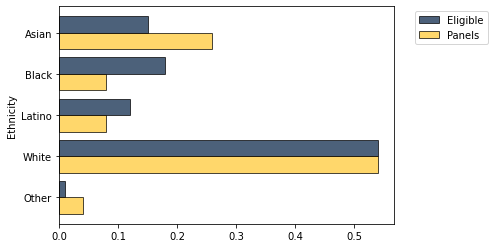

In [20]:
jury.barh('Ethnicity')

#### e)	Find the difference between the distribution for “Eligible” and “Panels” and populate a data frame with the result values (“The difference”) and display the “Eligible”. “Panels” and “The difference” indexing on “Ethnicity”. 

In [21]:
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


#### f)	Comment on the “The difference” computed. 

We can notice that the sum of the positive values in the difference is 0.14 and sum of negative values is -0.14.So the sum is 0.From this we can infer that the gold bar (Panels) exceeds the blue bar (Eligible) as same as the blue bar exceeds with gold bar.

* It can be observed that there is a significant difference for the Asians and Blacks as compared to the other ethnicities. 

* It seems partial that the whites do not have any difference i.e, all the eligible whites are recruited for the panel unlike the other ethnicity.

#### g)	Calculate the total variation distance between the distribution of ethnicities in the eligible juror population and the distribution in the panels

In [22]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2
def table_tvd(table, label, other):
    return total_variation_distance(table.column(label), table.column(other))

table_tvd(jury, 'Eligible', 'Panels')

0.14000000000000001

#### h)	Do a simulation to answer “Whether the panels are representative of the population”? Assume the panel size as 1200. Comment on your results. 

In [23]:
eligible_population = jury.column('Eligible')
panel_size = 1200
sample_distribution = sample_proportions(panel_size,eligible_population)
panels_and_sample = jury.with_column('Random Sample',sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.158333
Black,0.18,0.08,0.179167
Latino,0.12,0.08,0.108333
White,0.54,0.54,0.544167
Other,0.01,0.04,0.01


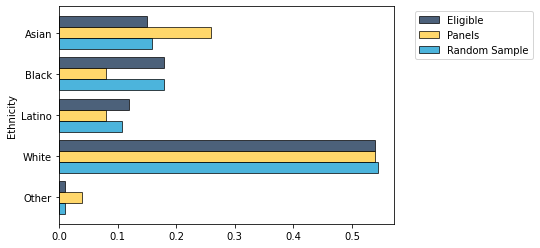

In [24]:
panels_and_sample.barh('Ethnicity')

In [25]:
eligible_population = jury.column('Eligible')
panel_size = 1200
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(panel_size,eligible_population)
    new_tvd = total_variation_distance(sample_distribution,eligible_population)
    tvds = np.append(tvds, new_tvd)
tvds
results = Table().with_column('TVD', tvds)
results

TVD
0.01
0.0108333
0.0258333
0.0258333
0.00916667
0.00416667
0.0116667
0.0325
0.0116667
0.0383333


C:\Users\Nithin KM\anaconda3\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


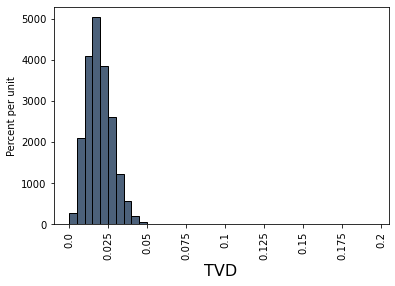

In [26]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2,0.005))

#### We can see that the  panels in our study were not quite so similar to the eligible population. 
#### The total variation distance between the panels and the population was 0.14, which is far out in the tail of the histogram above.
#### It does not look at all like a typical distance between a random sample and the eligible population.
#### The data in the panels is not consistent with the predicted values of the statistic based on the model of random selection.
#### So our analysis supports that the panels were not representative of the distribution provided for the eligible jurors.

In [27]:
swain_jury = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain_jury


Ethnicity,Eligible,Panel
Black,0.26,0.08
Other,0.74,0.92


In [28]:
table_tvd(swain_jury, 'Eligible', 'Panel')

0.18000000000000002

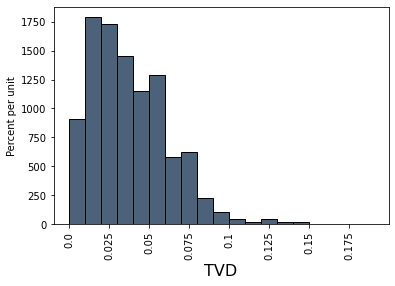

In [29]:
panel_size = 100
repetitions = 5000

tvds = make_array()

for i in np.arange(repetitions):

    new_sample = proportions_from_distribution(swain_jury, 'Eligible', panel_size)
    tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random Sample'))

results = Table().with_column('TVD', tvds)
results.hist(bins = np.arange(0, 0.2, 0.01))

* The random samples typically have a much smaller TVD than the value of 0.18 that we got for the panel and the eligible jurors.

* In this analysis, the data are not clouded by questions as in our previous analysis – the total numbers of people involved were relatively small, and the counting was done carefully for the Supreme Court case.

* Thus our analysis has a clear conclusion, which is that the panel was not representative of the population. It is hard to accept the Supreme Court's judgment that "the overall percentage disparity has been small."